----------------------------------

# Statistiques descriptives et analyses univariées

### Variable quantitative:

Les prix produits

### Variables qualitatives:

Les id (client_id, id_prod,)

Les dates de transactions ( )

Le sexe des clients (f ou m)

Les catégories produits (0, 1)

##### Pour mieux comprendre les ventes, l'analyse portera notamment les dimensions suivantes :

Les prix des produits

L'évolution des Chiffre d'Affaires (de ventes)

La répartition sectorielle (par Catégorie)

La répartition démographique par âge et sexe client

Le comportement client (fidélisation)

Corrélation, lien(s) possible(s) entre les variables

In [1]:
#Import des principales librairies Python
import pandas as pd
import seaborn as sns
import datetime as dt

import scipy.stats as st

import statsmodels.api as sm
import math as mth

import numpy as np 
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
%pylab inline
#Paramètres de style
pylab.style.use('fivethirtyeight') 
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
          'lines.linewidth': 1.5,
          'axes.labelsize': 'x-large',
          'axes.titlesize':35,
          'axes.titleweight':'bold',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import plotly.figure_factory as ff
import requests

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
#Chargement du dataset 'data_loca_voit.csv'
data = pd.read_csv('data_loca_voit.csv')
data.head(40)

,DATE,Num-CDE,CLIENT_ID,SEX,BIRTH,ID_PROD,PRICE_mensuel,Durée total,CATEG
0,2017-01-12,602709,80033,F,1989,274745,"193,48",49,0
1,2020-10-15,755279,155250,F,1978,14531,"405,4",31,0
2,2020-10-14,752849,140344,M,1979,165540,"422,17",31,0
3,2020-10-14,762646,165402,M,1965,192734,"423,33",31,0
4,2020-10-14,766855,207795,M,1965,277795,"236,19",43,0
5,2020-10-14,749531,137352,M,1960,192994,"351,24",43,0
6,2020-10-14,752966,176284,M,1969,15171,"352,69",31,0
7,2020-10-13,770132,163072,M,1974,194671,"388,26",19,0
8,2020-10-13,753517,151590,M,1973,126927,"465,3",31,0
9,2020-10-13,762947,140344,M,1963,194695,"321,71",43,0


In [5]:
data.tail(40)

,DATE,Num-CDE,CLIENT_ID,SEX,BIRTH,ID_PROD,PRICE_mensuel,Durée total,CATEG
6902,2019-06-13,678299,133666,M,1979,294098,"328,55",37,0
6903,2019-06-18,703802,207795,F,1976,230426,"300,78",31,0
6904,2019-06-18,693718,207795,M,1981,229179,"341,88",31,0
6905,2019-06-18,698984,207795,M,1964,229092,"283,79",31,0
6906,2019-06-18,698235,162450,M,1967,307638,"436,92",31,0
6907,2019-06-20,701266,162450,M,1982,229141,"270,72",31,0
6908,2019-06-20,696009,169344,F,1975,274746,"369,97",31,0
6909,2019-06-20,699564,162450,M,1985,229141,"313,13",31,0
6910,2019-06-18,701250,162450,M,1994,229066,"214,95",31,0
6911,2019-06-20,682154,162349,M,1978,229082,"279,09",31,0


In [6]:
data["PRICE_mensuel"] = data["PRICE_mensuel"].str.replace(",", ".")
data["PRICE_mensuel"] = data["PRICE_mensuel"].astype("float")

In [7]:
# Etude statistique de la dataframe
data.describe()

,Num-CDE,CLIENT_ID,BIRTH,ID_PROD,PRICE_mensuel,Durée total,CATEG
count,6942.000000,6942.000000,6942.000000,6942.000000,6942.000000,6942.000000,6942.000000
mean,722244.126332,164680.418611,1973.499280,177644.837655,363.322430,35.705848,0.002017
std,64308.072150,33724.847250,10.859992,96399.876846,176.285729,8.187538,0.044866
min,571706.000000,28684.000000,1900.000000,9000.000000,16.240000,1.000000,0.000000
25%,668269.500000,150813.000000,1965.000000,97093.250000,262.362500,31.000000,0.000000
50%,729659.000000,162406.000000,1972.000000,192950.000000,335.395000,31.000000,0.000000
75%,776689.000000,177084.000000,1980.000000,273917.000000,451.832500,43.000000,0.000000
max,840856.000000,244854.000000,2008.000000,312322.000000,4234.900000,67.000000,1.000000


## Analyse de l'évolution du chiffre d'affaires

In [8]:
print(data.dtypes)

DATE              object
Num-CDE            int64
CLIENT_ID          int64
SEX               object
BIRTH              int64
ID_PROD            int64
PRICE_mensuel    float64
 Durée total       int64
CATEG              int64
dtype: object


In [9]:
# ajout une colonne moi_année et modifiez le format de la date pour avoir que le mois et l'année
data['mois_année'] = pd.to_datetime(data['DATE'])
data['DATE'] = pd.to_datetime(data['DATE'])
data['mois_année'] = data['DATE'].apply(lambda x: x.strftime("%b %Y"))
data.head()

,DATE,Num-CDE,CLIENT_ID,SEX,BIRTH,ID_PROD,PRICE_mensuel,Durée total,CATEG,mois_année
0,2017-01-12,602709,80033,F,1989,274745,193.48,49,0,Jan 2017
1,2020-10-15,755279,155250,F,1978,14531,405.40,31,0,Oct 2020
2,2020-10-14,752849,140344,M,1979,165540,422.17,31,0,Oct 2020
3,2020-10-14,762646,165402,M,1965,192734,423.33,31,0,Oct 2020
4,2020-10-14,766855,207795,M,1965,277795,236.19,43,0,Oct 2020


In [10]:
#Nouvelle vérification des valeurs manquantes
data.isnull().sum()

DATE             0
Num-CDE          0
CLIENT_ID        0
SEX              0
BIRTH            0
ID_PROD          0
PRICE_mensuel    0
 Durée total     0
CATEG            0
mois_année       0
dtype: int64

In [11]:
#Total du chiffre d'affaire
df = data
loc_CA = df.groupby('mois_année').sum().reset_index()
loc_CA['mois-année'] = pd.to_datetime(loc_CA['mois_année'])
loc_CA = loc_CA.sort_values('mois_année')

loc_CA['cumprice'] = df['PRICE_mensuel'].cumsum()
loc_CA = loc_CA[['mois_année', 'PRICE_mensuel', 'cumprice']]

print(loc_CA)
print('Total du chiffre d\'affaire :', round(loc_CA['PRICE_mensuel'].sum(), 2))

   mois_année  PRICE_mensuel  cumprice
0    Apr 2017        2061.67    193.48
1    Apr 2018       45977.10    598.88
2    Apr 2019       44355.53   1021.05
3    Apr 2020       64289.27   1444.38
4    Apr 2021       67540.20   1680.57
..        ...            ...       ...
65   Sep 2018       26384.68  26282.64
66   Sep 2019       38549.98  26929.56
67   Sep 2020       49264.71  27103.17
68   Sep 2021       50542.28  27794.64
69   Sep 2022        9486.18  28132.61

[70 rows x 3 columns]
Total du chiffre d'affaire : 2522184.31


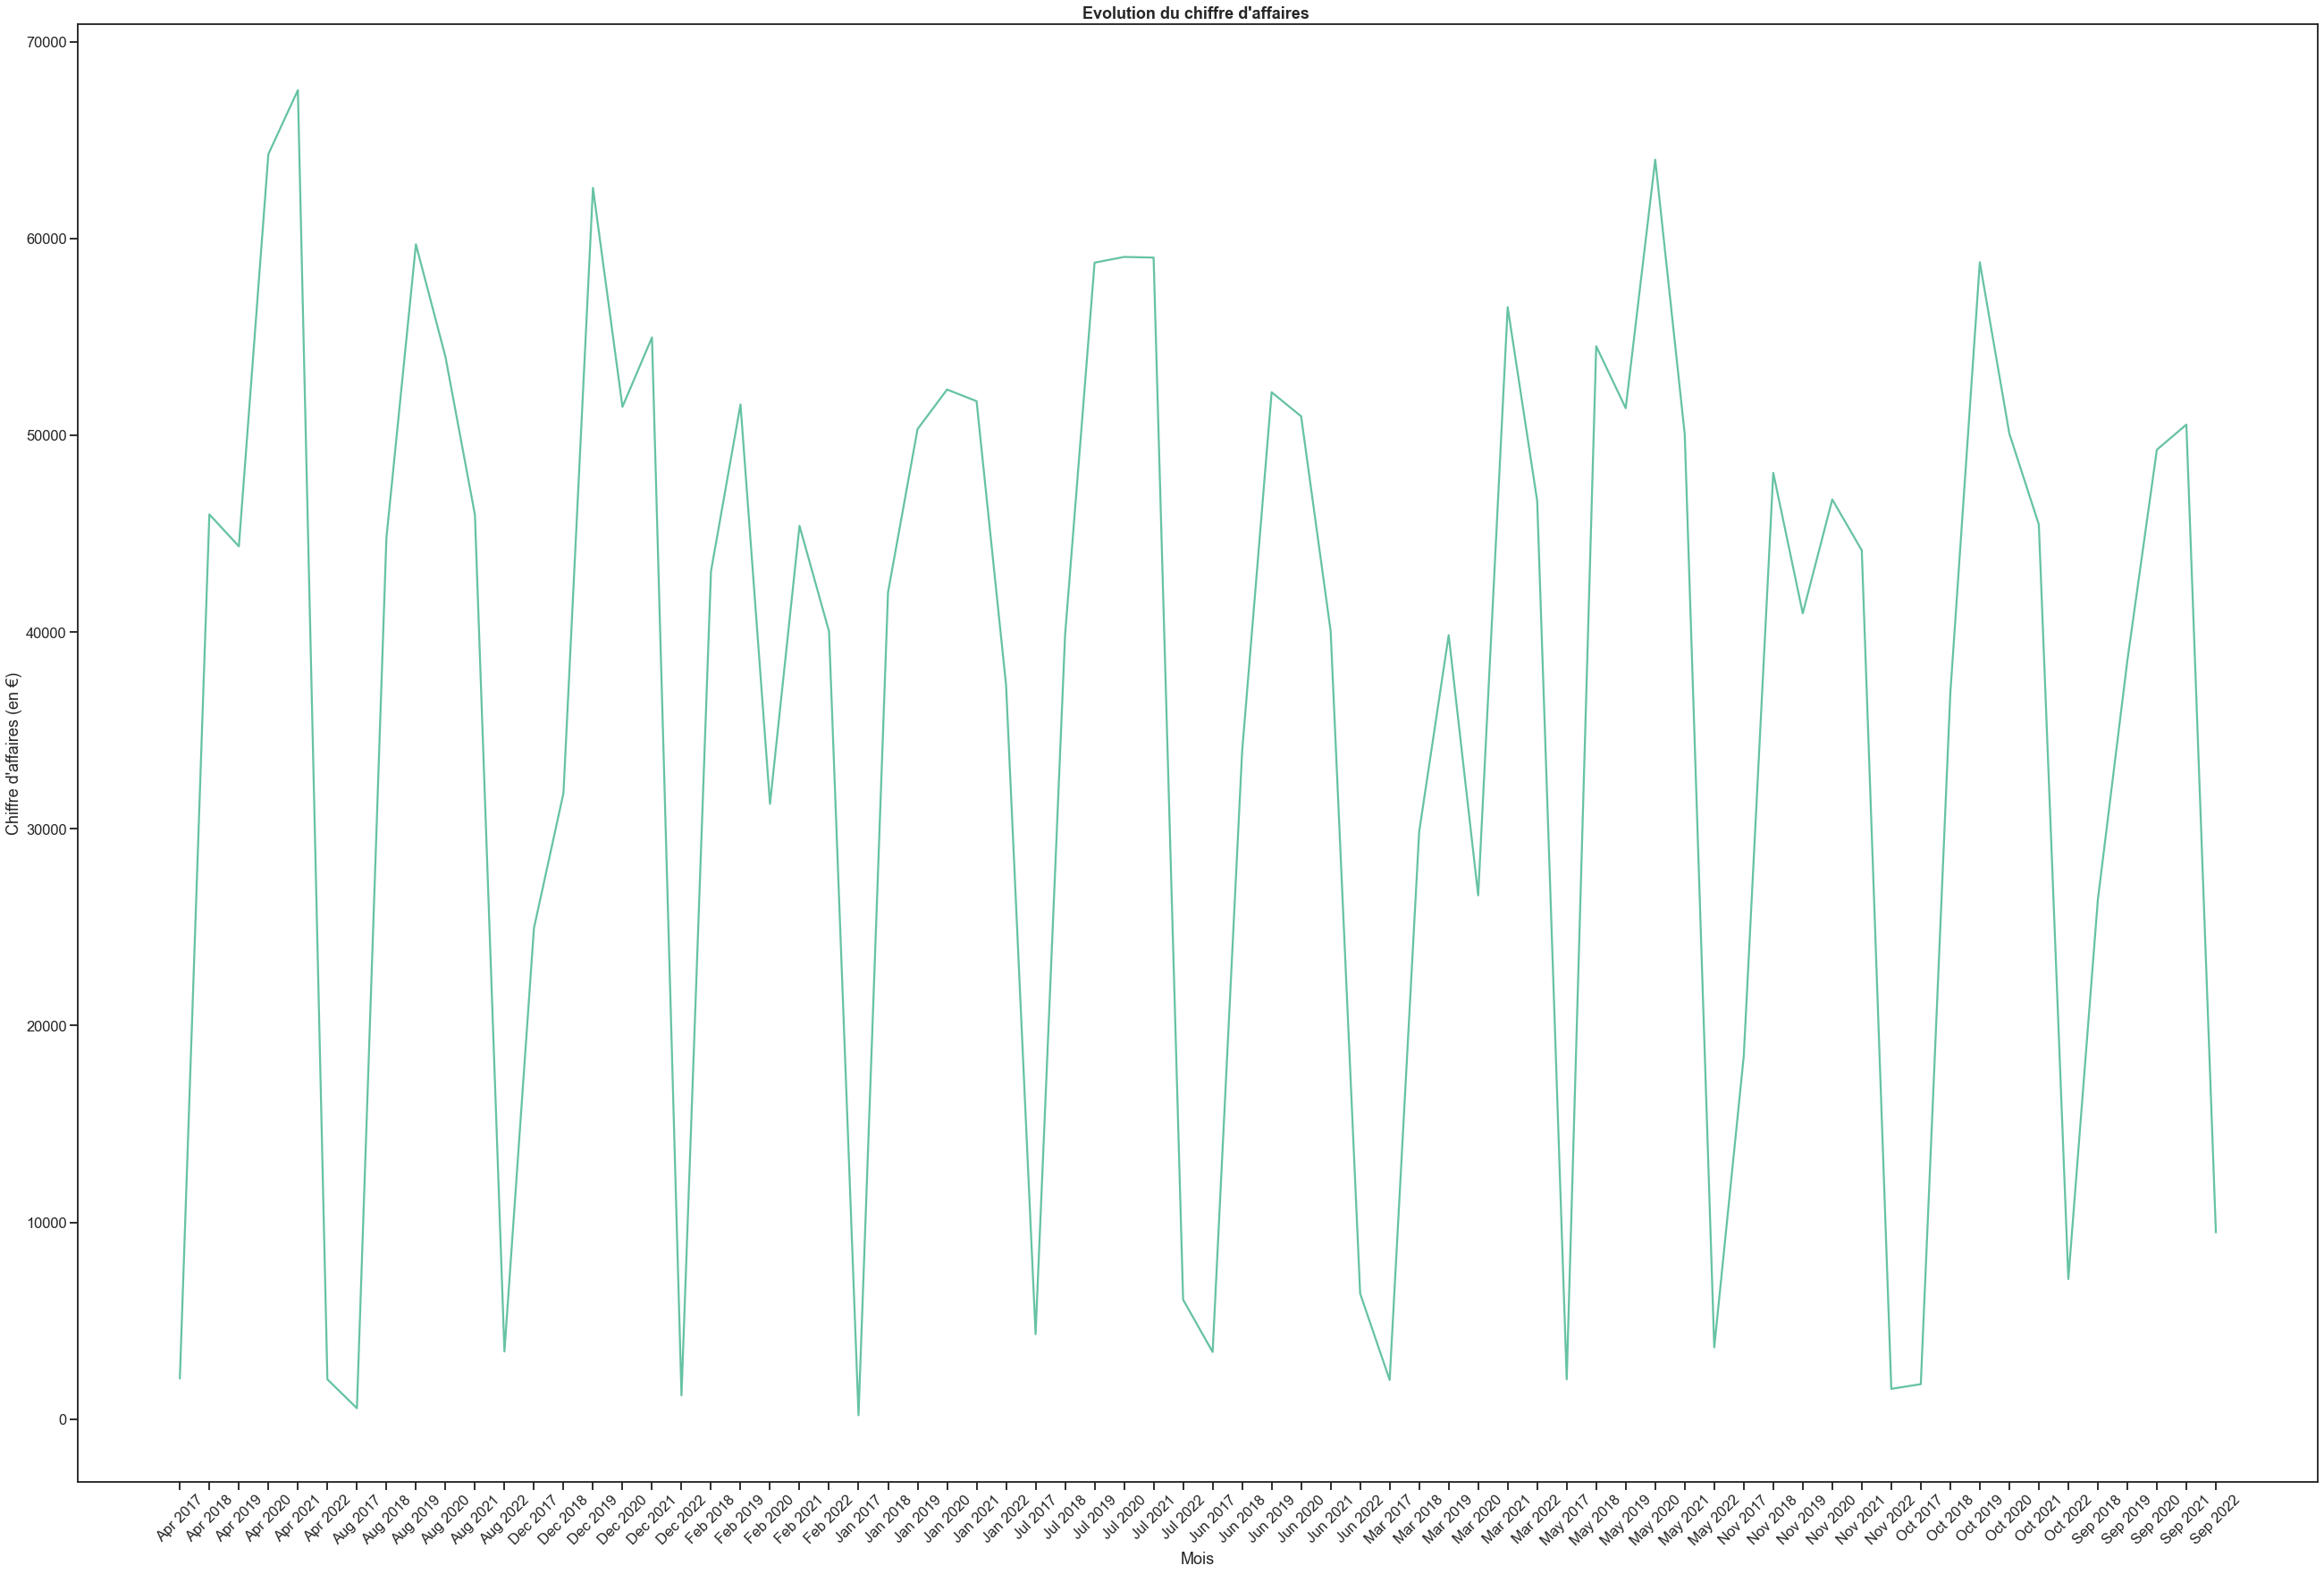

In [12]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize = (40,30))

plt.plot(loc_CA['mois_année'], loc_CA['PRICE_mensuel'])
plt.xticks(rotation=45)
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires (en €)')
plt.title('Evolution du chiffre d\'affaires ')
plt.savefig("Evolution du chiffre d'affaires.png",dpi=120)
plt.show()

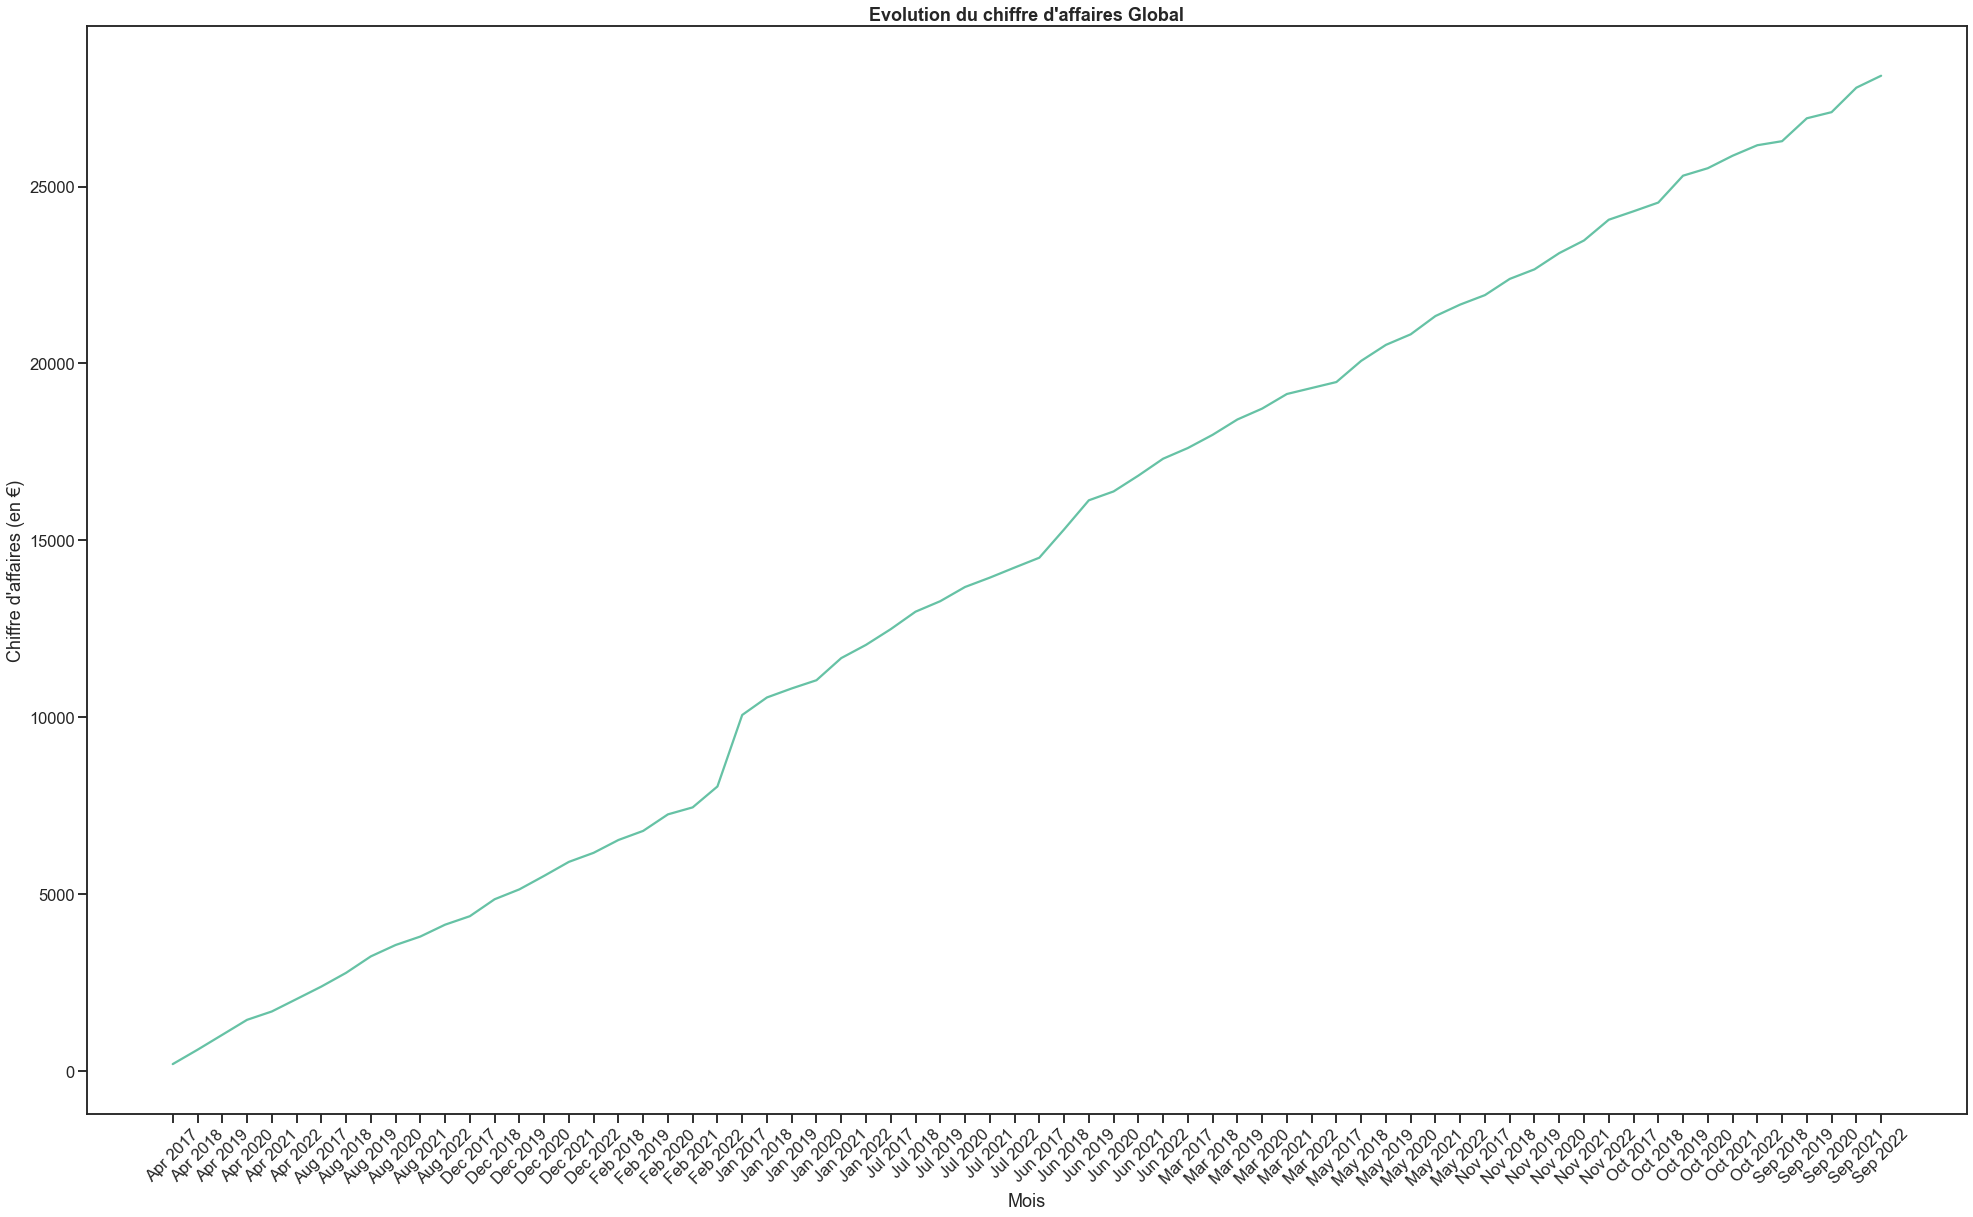

In [13]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize = (30,20))

plt.plot(loc_CA['mois_année'], loc_CA['cumprice'])
plt.xticks(rotation=45)
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires (en €)')
plt.title('Evolution du chiffre d\'affaires Global')
plt.savefig("Evolution du chiffre d'affaires Global.png",dpi=120)
plt.show()

On constate que le CA a évolue au fil du temps

## Répartition du CA par catégorie

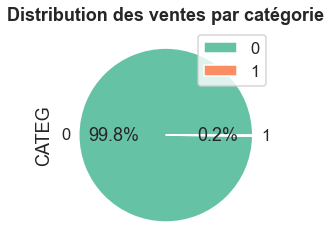

In [14]:
# distribution des ventes par catégorie
data['CATEG'].value_counts(normalize=True).plot(kind='pie',legend=True,autopct='%1.1f%%')
plt.title('Distribution des ventes par catégorie')
plt.savefig('Distribution des ventes par catégorie.png', dpi=300, bbox_inches='tight')
plt.show()

La catégorie 0 représente 99.8% des ventes, la catégorie 1 seulement 0.2%.

nous remarquons que la catégories 0  ont une influence sur le chiffre d'affaires total.

##### Pour comprendre cette inégalité, regardons les statistiques des prix pour chaque catégorie

In [15]:
# Statistique des prix dans chaque catégorie
for i in sorted(data['CATEG'].unique()):
    print('Catégorie', i)
    print(pd.Series(data[data['CATEG']==i]['PRICE_mensuel'].describe()), '\n')

Catégorie 0
count    6928.000000
mean      362.682207
std       175.679682
min        16.240000
25%       262.265000
50%       334.895000
75%       451.405000
max      4234.900000
Name: PRICE_mensuel, dtype: float64 

Catégorie 1
count      14.000000
mean      680.141429
std       197.011333
min       386.250000
25%       501.087500
50%       702.820000
75%       833.137500
max      1028.680000
Name: PRICE_mensuel, dtype: float64 



Nous remarquons que la catégorie 1 est plus chères que la catégorie 0.

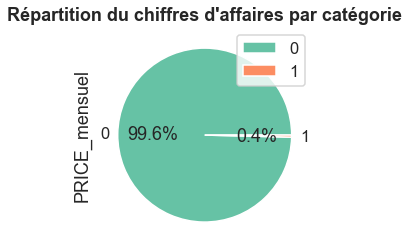

In [16]:
# répartition du Chiffre d'affaires par catégorie
df=data.pivot_table(index='CATEG', aggfunc={'PRICE_mensuel': np.sum}).plot(kind='pie', y='PRICE_mensuel',legend=True, autopct='%1.1f%%')
plt.title('Répartition du chiffres d\'affaires par catégorie')
plt.savefig('Répartition du chiffres d\'affaires par catégorie.png', dpi=300, bbox_inches='tight')
plt.show()

Au final nous remarquons que la catégorie 0 à un grand nombre de ventes (99.6%), contrairement à la categorie 1 qui représente 0.4% du chiffre d'affaires.

Cette analyse nous permet de dire que le chiffre d'affaires est corrélé à la categorie de location du voiture de type catégorie 0.

In [17]:
# Transactions durrant l'année 2017_2018, toutes catégories
transaction_2017_2018 = data[(data['DATE']>='2017-01-12') & (data['DATE']<='2018-01-12')]

# Pourcentage des locations durrant l'année 2017_2018
print('les location de l année 2017_2018 represente ', round((len(transaction_2017_2018) / len(data) * 100), 2), '% du dataset')


les location de l année 2017_2018 represente  3.11 % du dataset


In [18]:
# Transactions durrant l'année 2019_2020, toutes catégories
transaction_2019_2020 = data[(data['DATE']>='2019-01-12') & (data['DATE']<='2020-01-12')]

# Pourcentage des locations durrant l'année 2019_2020
print('les location de l année 2019_2020 represente ', round((len(transaction_2019_2020) / len(data) * 100), 2), '% du dataset')


les location de l année 2019_2020 represente  24.96 % du dataset


In [19]:
# Transactions durrant l'anné 2021_2022, toutes catégories
transaction_2021_2022 = data[(data['DATE']>='2021-01-12') & (data['DATE']<='2022-01-12')]

# Pourcentage des locations durrant l'année 2021_2022
print('les location de l année 2021_2022 represente ', round((len(transaction_2019_2020) / len(data) * 100), 2), '% du dataset')


les location de l année 2021_2022 represente  24.96 % du dataset


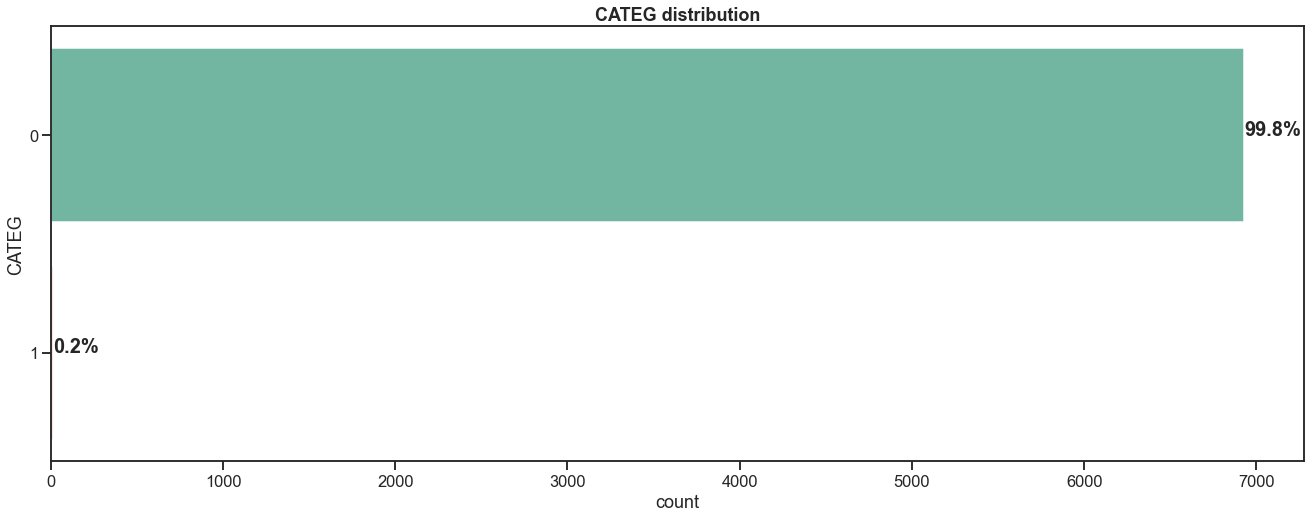

In [20]:
ax, fig = plt.subplots(figsize=(20,8)) 
ax = sns.countplot(y='CATEG', data=data)
ax.set_title("CATEG distribution")

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(data.CATEG))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')
plt.savefig("Distribution par gatégorie_P8.png",dpi=100)
show()

Notons des classes déséquilibrées. Il y a beaucoup plus de produits categ 1 que categ 2

# Les tops

In [21]:
# Les 10 Produits aux plus gros chiffres d'affaires annuels
data.pivot_table(index=['ID_PROD', 'CATEG'], aggfunc={'PRICE_mensuel': np.sum}).sort_values(by='PRICE_mensuel', ascending=False).reset_index().head(10).rename(columns={'PRICE_mensuel': 'CA Total'})

,ID_PROD,CATEG,CA Total
0,186837,0,47546.79
1,167910,0,40589.71
2,164670,0,35293.87
3,186838,0,24168.77
4,192989,0,21265.17
5,195115,0,20725.31
6,273991,0,18030.53
7,304615,0,16831.12
8,273825,0,15645.82
9,196565,0,15226.43


Les 10 Locations avec le plus gros chiffres d'affaires annuels appartiennent à la categorie 0.

# Les flops

In [22]:
# Les 10 produits aux plus bas chiffres d'affaires annuels
data.pivot_table(index=['ID_PROD', 'CATEG'], aggfunc={'PRICE_mensuel': np.sum}).sort_values(by=['PRICE_mensuel', 'ID_PROD'], ascending=True).reset_index().head(10)

,ID_PROD,CATEG,PRICE_mensuel
0,13187,0,16.24
1,162875,0,36.71
2,38056,0,48.59
3,11443,0,49.67
4,13667,0,55.83
5,291483,0,63.99
6,275023,0,68.10
7,187954,0,71.81
8,294131,0,80.66
9,294243,0,80.66


# La périodicité des ventes par catégorie

Catégorie 0


<Figure size 720x360 with 0 Axes>

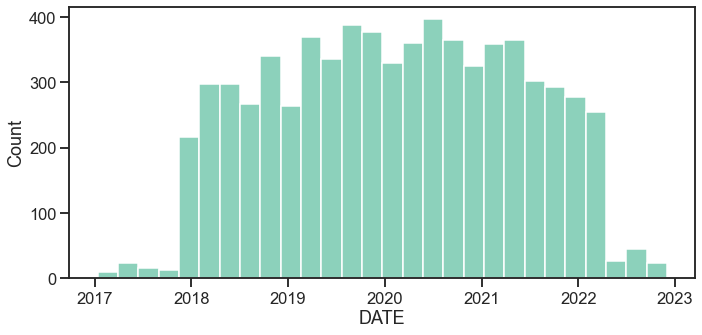

Catégorie 1


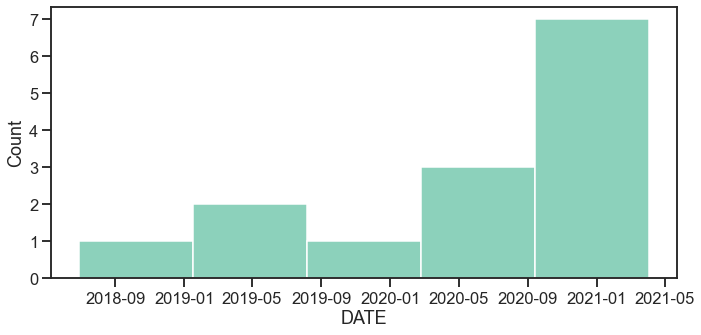

In [23]:
plt.figure(figsize=(10,5))
for i in sorted(data['CATEG'].unique()):
    print('Catégorie', i)
    plt.figure(figsize=(10,5))
    sns.histplot(data=data[data['CATEG']==i], x='DATE')
    plt.savefig("périodicité des ventes par gatégorie.png",dpi=100)
    plt.show()

La catégorie 0 : meilleures ventes de 2018 jusqu'au 2022

La catégorie 1 : meilleures ventes pour l'année 2021



# Analyse des prix pratiqués : variable 'price_mensuel' 

## Mesures de tendance centrale et dispersion des prix produits

In [24]:
#Calcul de la Moyenne des prix produits louer 
round(data['PRICE_mensuel'].mean(), 2)

363.32

In [25]:
#Calcul de la Mediane des prix produits louer
data['PRICE_mensuel'].median()

335.395

In [26]:
#Calcul du Mode des prix produits louer
data['PRICE_mensuel'].mode()

0    334.55
Name: PRICE_mensuel, dtype: float64

In [27]:
#Calcul de la Variance des prix produits louer
round(data['PRICE_mensuel'].var(ddof=0), 2)

31072.18

In [28]:
#Calcul de l'écart type des prix produits vendus 
round(data['PRICE_mensuel'].std(ddof=0), 2)

176.27

# la distribution des prix des produits indépendamment de leur catégorie.

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


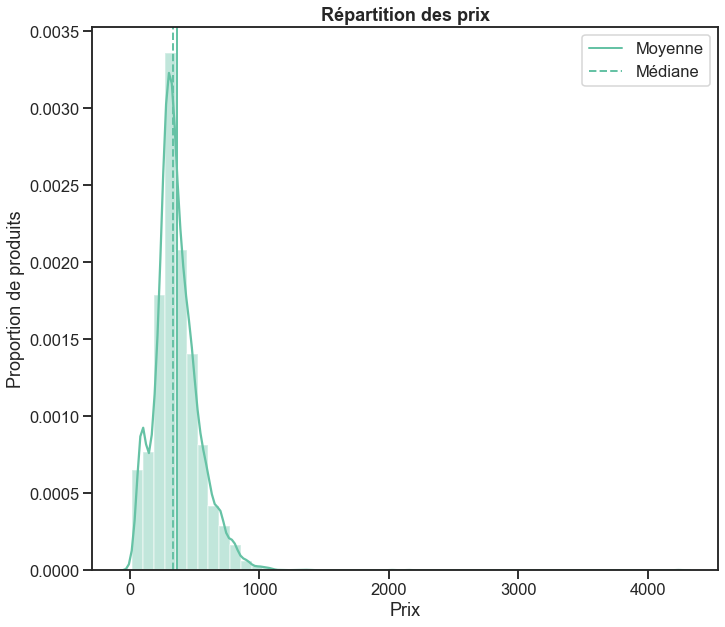

In [29]:
# Graphique distribution prix
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')

plt.figure(figsize = (10,10))
sns.distplot(data['PRICE_mensuel'])
plt.axvline(x=data['PRICE_mensuel'].mean(), label='Moyenne', linestyle='-', linewidth=2)
plt.axvline(x=data['PRICE_mensuel'].median(), label='Médiane', linestyle='--', linewidth=2)
plt.xlabel('Prix')
plt.ylabel('Proportion de produits')
plt.title('Répartition des prix')
plt.legend()

plt.savefig("Répartition des prix.png",dpi=120)
plt.show()

In [30]:
data_skew = st.skew(data['PRICE_mensuel'])
print('Skewness des prix : ', data_skew)

Skewness des prix :  2.4859623400432285


In [31]:
## Tendances centrales Prix
data["PRICE_mensuel"].describe()

count    6942.000000
mean      363.322430
std       176.285729
min        16.240000
25%       262.362500
50%       335.395000
75%       451.832500
max      4234.900000
Name: PRICE_mensuel, dtype: float64

In [32]:
data.PRICE_mensuel.sum()

2522184.31

La distribution des valeurs des prix est asymétrique. Le prix moyen des produits est de 363.32€ (std: 176.28€) et la médiane est de 335.39€. La médiane et la moyenne sont très proches. L'asymétrie vers la gauche des prix montre les prix le moins de 335 et vers la droite les prix le plus de 363.

# Analyse sectorielle de l'activité : variable 'CATEG'

In [33]:
#Représentation des effectifs par catégories de vente(méthode .value_counts())
effectif = data['CATEG'].value_counts()
modalite = effectif.index #l'index de 'effectifs' contient les modalités

tab = pd.DataFrame(modalite, columns = ['CATEG']) #création du tableau à partir des modalités
tab["n"] = effectif.values
tab["f"] = tab["n"] / len(data) #len(data) renvoie la taille de l'échantillon
tab

,CATEG,n,f
0,0,6928,0.997983
1,1,14,0.002017


In [34]:
#Fréquences cumulées
tab = tab.sort_values("CATEG") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
tab

,CATEG,n,f,F
0,0,6928,0.997983,0.997983
1,1,14,0.002017,1.000000


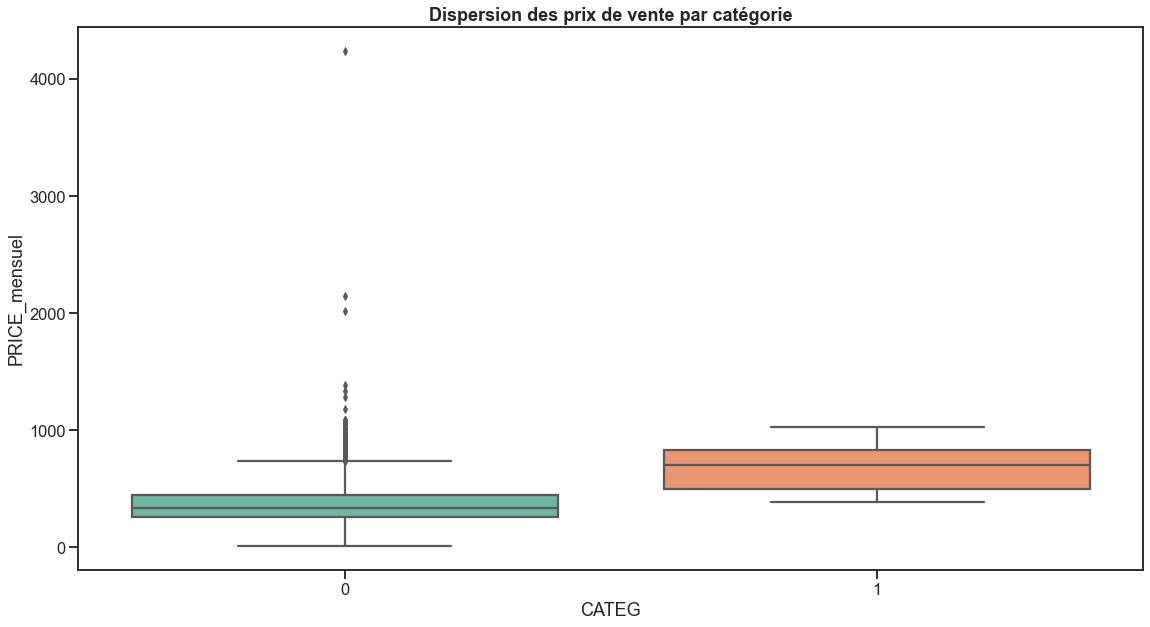

In [35]:
#Autre représentation possible avec Seaborn
plt.figure(figsize=(17, 10))
sns.boxplot(x = 'CATEG', y = 'PRICE_mensuel', data = data, palette="Set2")
plt.title('Dispersion des prix de vente par catégorie')
plt.savefig("Dispersion des prix de vente par gatégorie.png",dpi=100)
plt.show()

Les 2 catégories n'ont pas les mêmes types (ou gamme)de produits. La catégorie 0 par exemple a un prix moyen de 360€ avec des outliers en queue de distribution jusqu'à 4100€.

La catégorie 1 a un prix moyen de 680€

# Analyse démographique de l'activité

## Variable 'birth'

In [36]:
#Ajout d'une colonne'age' pour faciliter l'analyse
data['age'] = 2022 - data.BIRTH
data

,DATE,Num-CDE,CLIENT_ID,SEX,BIRTH,ID_PROD,PRICE_mensuel,Durée total,CATEG,mois_année,age
0,2017-01-12,602709,80033,F,1989,274745,193.48,49,0,Jan 2017,33
1,2020-10-15,755279,155250,F,1978,14531,405.40,31,0,Oct 2020,44
2,2020-10-14,752849,140344,M,1979,165540,422.17,31,0,Oct 2020,43
3,2020-10-14,762646,165402,M,1965,192734,423.33,31,0,Oct 2020,57
4,2020-10-14,766855,207795,M,1965,277795,236.19,43,0,Oct 2020,57
...,...,...,...,...,...,...,...,...,...,...,...
6937,2020-08-11,751324,151590,M,1966,84897,421.37,31,1,Aug 2020,56
6938,2019-02-20,667025,151590,M,1967,229303,475.56,35,1,Feb 2019,55
6939,2021-04-03,770234,151590,M,1971,86124,806.40,19,1,Apr 2021,51
6940,2020-05-21,702311,156075,F,1989,294521,782.85,31,1,May 2020,33


In [37]:
# Tranches d'âge
data['classe_age'] = '18-30'
data['classe_age'].loc[data[data['age']>=30].index] = '30-40'
data['classe_age'].loc[data[data['age']>=40].index] = '40-50'
data['classe_age'].loc[data[data['age']>=50].index] = '50-60'
data['classe_age'].loc[data[data['age']>=60].index] = '60-70'
data['classe_age'].loc[data[data['age']>=70].index] = '70-80'
data['classe_age'].loc[data[data['age']>=80].index] = '80 et +'


In [38]:
data.head()

,DATE,Num-CDE,CLIENT_ID,SEX,BIRTH,ID_PROD,PRICE_mensuel,Durée total,CATEG,mois_année,age,classe_age
0,2017-01-12,602709,80033,F,1989,274745,193.48,49,0,Jan 2017,33,30-40
1,2020-10-15,755279,155250,F,1978,14531,405.40,31,0,Oct 2020,44,40-50
2,2020-10-14,752849,140344,M,1979,165540,422.17,31,0,Oct 2020,43,40-50
3,2020-10-14,762646,165402,M,1965,192734,423.33,31,0,Oct 2020,57,50-60
4,2020-10-14,766855,207795,M,1965,277795,236.19,43,0,Oct 2020,57,50-60


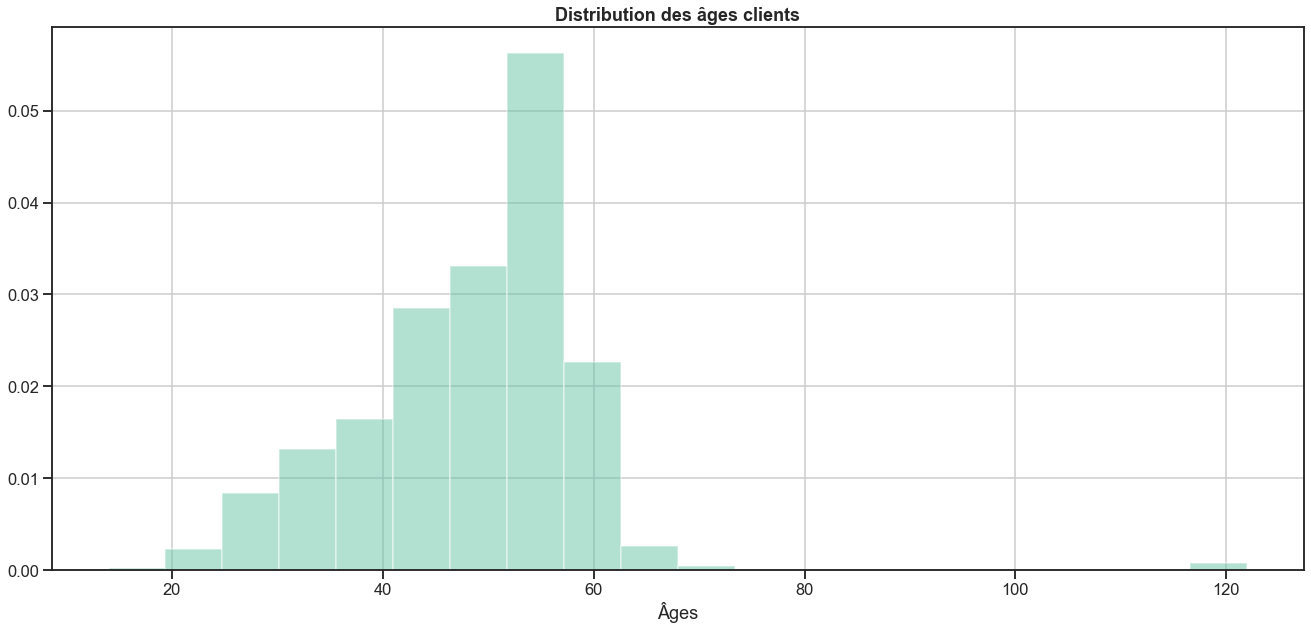

In [39]:
#Visualisation (Histogramme)de la distribution de l'âge clients
plt.figure(figsize = (20,10))
data['age'].hist(density=True, alpha=0.5, bins=20)

plt.xlabel('Âges')
plt.title('Distribution des âges clients')
plt.savefig("distribution des âges clients_P8.png",dpi=100)

plt.show()

La majeure partie des clients se concentrent entre 30 et 60 ans.

Le client âgé de 120 ans fait l'objet d'un enregistrement client dans la base de données de
L’entreprise avec sa date de naissance provisoire.


In [40]:
# Distribution des âges entre le deucx Catégories

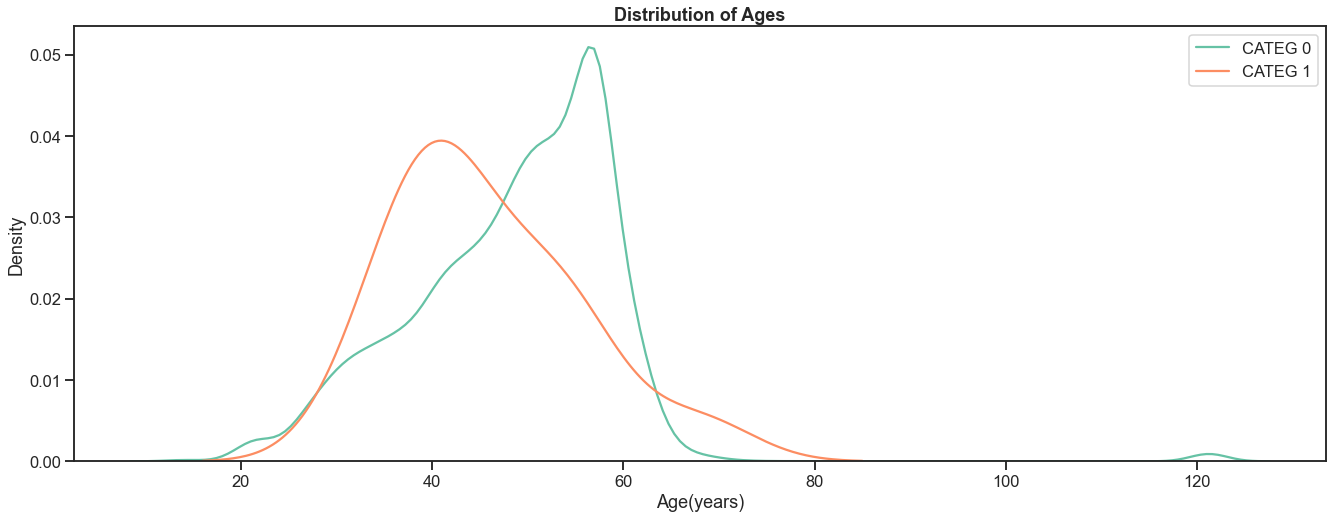

In [41]:
plt.figure(figsize = (20, 8))
sns.kdeplot(data[data['CATEG'] == 0]['age'] , label = 'CATEG 0')
sns.kdeplot(data[data['CATEG'] == 1]['age'], label = 'CATEG 1')

plt.legend(), plt.xlabel('Age(years)'), plt.ylabel('Density'), plt.title('Distribution of Ages')
plt.savefig("Distribution of age.png",dpi=100)
show()

La courbe cible CATEG 0 s'incline vers l'extrémité de la plus jeune 

## Lien entre l'age des clients et la categorie de produit louer

### Distribution des ventes par âge et par catégorie

<Figure size 720x360 with 0 Axes>

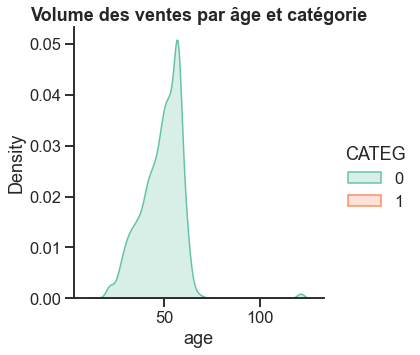

In [44]:
# Distribution des ventes par age et par catégorie
plt.figure(figsize=(10,5))
sns.displot(data=data, x='age', hue='CATEG', kind='kde', fill=True)
plt.title('Volume des ventes par âge et catégorie')
plt.savefig('Volume des ventes par âge et catégorie.png', dpi=300, bbox_inches='tight')
plt.show()

La catégorie 0 : principalement achetés par les clients entre 30-60 ans



## Distribution du total des achats par classe d'âge

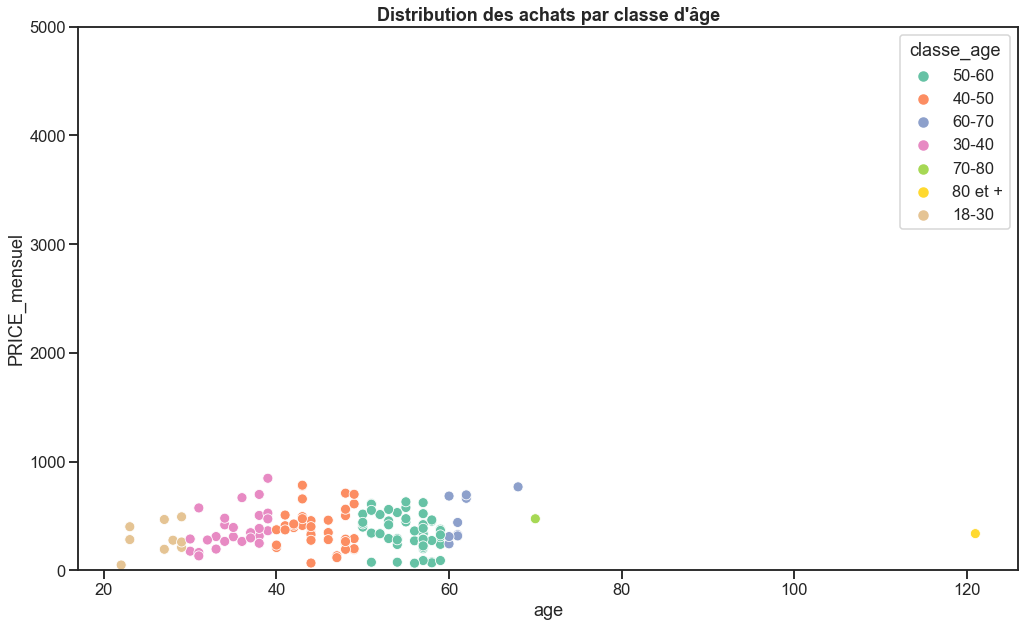

In [45]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=data.sample(150), x='age', y='PRICE_mensuel', hue='classe_age', s=100)
plt.title('Distribution des achats par classe d\'âge')
plt.ylim([0,5000])
plt.savefig("Distribution du total des achats par classe d'âge.png",dpi=100)
plt.show()

Les 30-50 ans concentrent ainsi les plus gros chiffres d'affaires, suivis par les moins de 30 ans.

Le chiffre d'affaires des clients particuliers est logiquement corrélé à la classe d'âge.

##### On s'intéresse à la répartition des femmes et des hommes dans notre Analyse.

# Variable 'sex'

In [46]:
#Méthode .value_counts() pour avoir une idée rapide de la répartition homme/femme chez les clients
data['SEX'].value_counts()

M    5147
F    1795
Name: SEX, dtype: int64

In [47]:
#Méthode .pivot_table() pour affiner davantage la répartition des hommes et des femmes selon la catégorie d'achat
fm = data.pivot_table(index='SEX', columns='CATEG', values='PRICE_mensuel', aggfunc=sum).reset_index()

In [48]:
%pylab inline
#Paramètres de style
pylab.style.use('fivethirtyeight') 
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
          'lines.linewidth': 1.5,
          'axes.labelsize': 'x-large',
          'axes.titlesize':35,
          'axes.titleweight':'bold',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<Figure size 2880x1440 with 0 Axes>

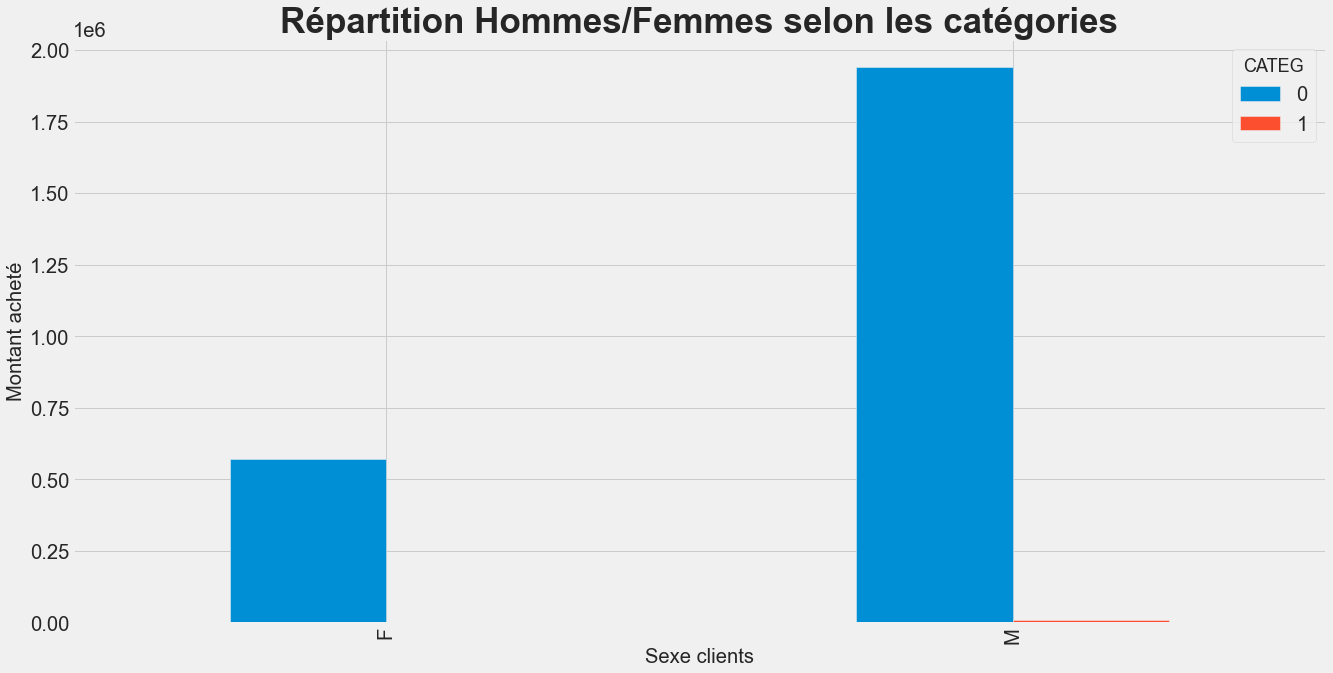

In [49]:

plt.figure(figsize = (40,20))
fm.plot(kind='bar', x='SEX')

plt.title('Répartition Hommes/Femmes selon les catégories')
plt.xlabel('Sexe clients')
plt.ylabel('Montant acheté')


plt.savefig("Répartition HommesFemmes par catégorie.png",dpi=120)
plt.show()

Le nombre de locataires masculins est supérieur à celui des femmes. 

Il est également possible de constater que les produits de la catégorie 1 ne sont apparus que légèrement chez les hommes.

# Analyse bivariées

# corrélations

#### Les corrélations indiquent si deux variables sont linéairement équivalentes.

quelques questions pour nous aider à mieux comprendre les ventes:

- Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

- Y a-t-il une corrélation entre l'âge des clients et le montant total des achats ?

- Y a-t-il une corrélation entre l'âge des clients et la fréquence d’achat?

- Y a-t-il une corrélation entre l'âge des clients et les catégories de produits achetés ?

##### Un peu de théorie :

Pour reprendre la définition de Wikipédia que je trouve plutôt bien trouvée :

"En probabilités et en statistique, la corrélation entre plusieurs variables aléatoires ou statistiques est une notion de liaison qui contredit leur indépendance."

## Première approche des corrélations sur l'ensemble de nos variables numériques

In [50]:
#Utilisation de la méthode .corr()
data.corr().head()

,Num-CDE,CLIENT_ID,BIRTH,ID_PROD,PRICE_mensuel,Durée total,CATEG,age
Num-CDE,1.000000,0.133384,-0.022787,-0.110485,0.092471,-0.085568,0.003925,0.022787
CLIENT_ID,0.133384,1.000000,-0.202706,-0.086732,-0.192667,0.052697,-0.028514,0.202706
BIRTH,-0.022787,-0.202706,1.000000,0.070411,-0.011583,-0.012019,0.011535,-1.000000
ID_PROD,-0.110485,-0.086732,0.070411,1.000000,-0.134209,-0.024944,-0.011745,-0.070411
PRICE_mensuel,0.092471,-0.192667,-0.011583,-0.134209,1.000000,-0.263855,0.080795,0.011583


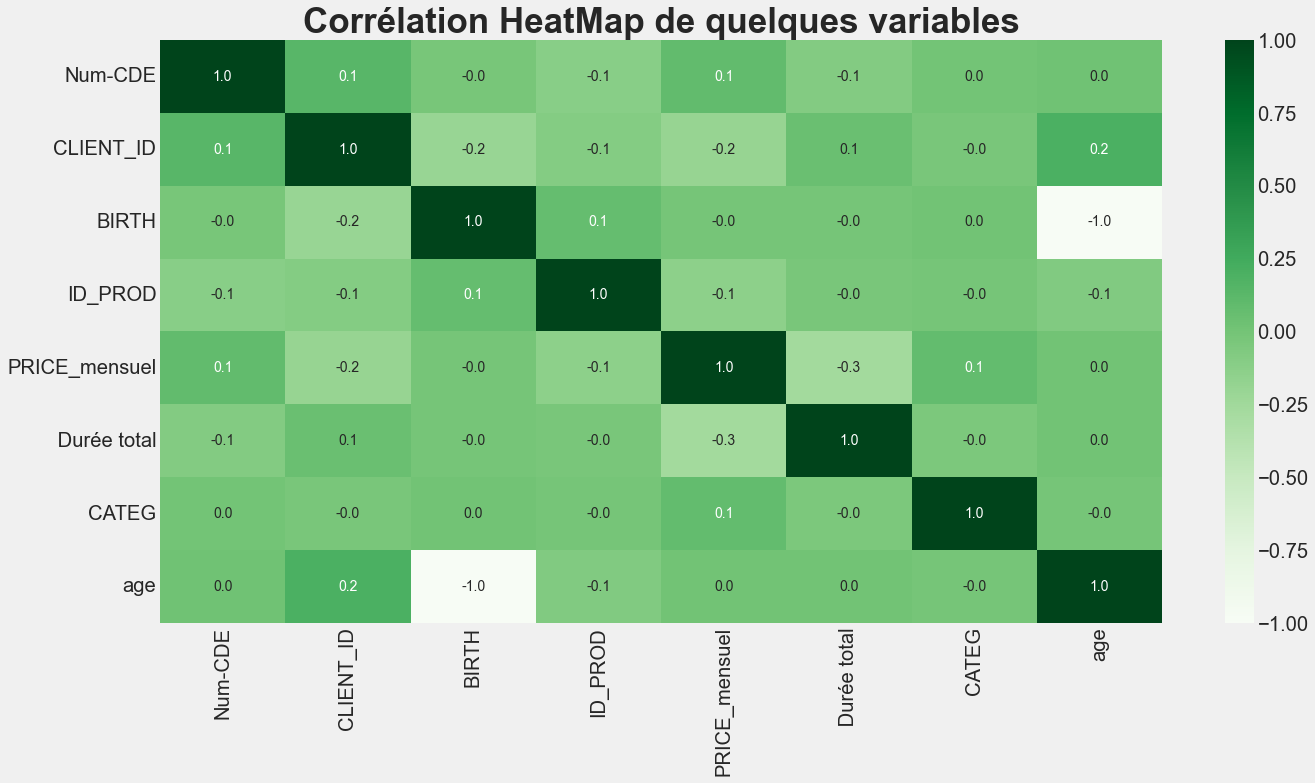

In [51]:
#Méthode .corr() avec par défaut la formule de la corrélation linéaire de Pearson
sns.heatmap(data.corr(), annot=True, fmt=".1f", cmap='Greens')
plt.title('Corrélation HeatMap de quelques variables')
plt.savefig("Corrélation HeatMap de variables.png",dpi=100)
plt.show()

## Analyse de la corrélation entre le sexe des clients et les catégories de produits louer

In [52]:
# Création du tableau de contingence "Matrice des valeurs observées"
# Variables 'sex' et 'categ' du dataframe df
X = 'SEX'
Y = 'CATEG'

# Calcul du tableau de contigence par la méthode .pivot_table()
c = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len) ###, margins=True, margins_name='Total'
tx = data[X].value_counts()
ty = data[Y].value_counts()

# Création d'une copie du dataframe original
cont = c.copy()
cont

CATEG,0,1
SEX,,
F,1792,3
M,5136,11


In [53]:
# Création de la "Matrice des valeurs attendues"
# L’occurrence attendue est simplement la fréquence que l’on devrait trouver dans une cellule 
# si l’hypothèse nulle était vraie.
tx_data= pd.DataFrame(tx)
ty_data = pd.DataFrame(ty)

tx_data.columns = ["s"]
ty_data.columns = ["s"]

# Valeurs totales observées
n = len(data)

# Produit matriciel. On utilise pd.T pour pivoter une des deux séries.
indep = (tx_data.dot(ty_data.T) / n)
indep

,0,1
M,5136.619994,10.380006
F,1791.380006,3.619994


In [54]:
# Matrice "écart au carré normalisé de la valeur attendue VS valeur observée"
mesure = (c-indep)**2/indep
mesure

CATEG,0,1
F,0.000215,0.106186
M,0.000075,0.037032


In [55]:
# Calcul du Chi2
# Tester l’hypothèse nulle consiste à comparer les occurrences observées (celles déjà dans le tableau) 
# avec les occurrences attendues.
chi2 = mesure.sum().sum()
chi2

0.1435075000017458

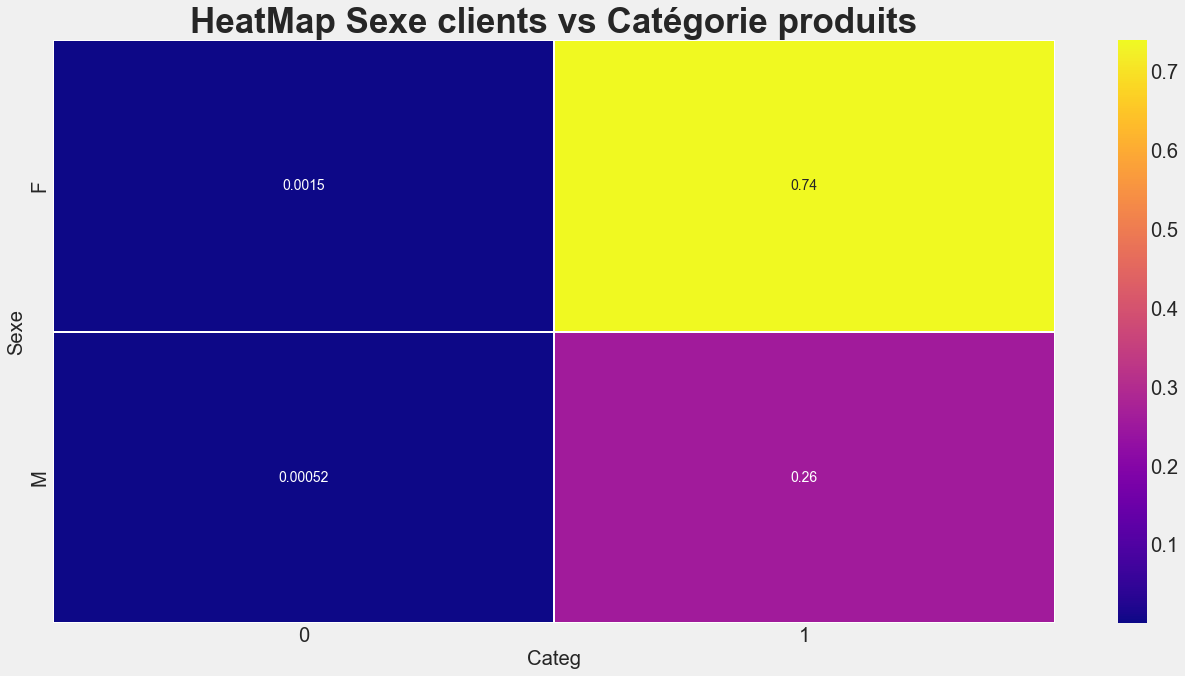

In [56]:
# HeatMap 
table = (mesure/chi2)
sns.heatmap(table, annot=True, cmap="plasma", linewidths=0.1)

plt.title('HeatMap Sexe clients vs Catégorie produits')
plt.xlabel('Categ')
plt.ylabel('Sexe')
plt.savefig("Heatmap sexe clients vs catégorie produits.png",dpi=120)

plt.show()

Le test de Chi2 est utilisé pour tester l'hypothèse nulle (H0) d'absence de relation entre deux variables catégorielles, ce test vérifie donc l'hypothèse d'indépendance de ces variables.

La valeur de Chi2 est une quantification de cet écart (entre les occurrences attendues et celles observées). Plus la valeur sera élevée, plus l'écart entre l'hypothèse nulle et la situation réelle sera grand.

Plus l’occurrence observée est près de l’occurrence attendue, plus la fraction calculée pour chaque cellule est petite et moins l’écart avec H0 est grand.

In [57]:
# Calcul du khi2 et de la p-value à partir de la matrice des valeurs observées avec scipy 
# Degré de liberté = (nombre de lignes – 1) X (nombre de colonnes – 1)
chi2, pvalue, degrees, expected = st.chi2_contingency(cont)
chi2, degrees, pvalue

(0.005375514978108429, 1, 0.9415531450846694)

## Corrélation entre l'âge des clients et le montant total des achats

In [58]:
#Agrégation pour sommer les ventes 'price_mensuel' (produits louer) en fonction de l'âge des clients
#Création d'une variable 'age, price_mensuel'
age_price = data.groupby('age').sum().reset_index()
age_price = age_price[['age', 'PRICE_mensuel']].sort_values(by='age', ascending=False) 
age_price['PRICE_mensuel'] = age_price['PRICE_mensuel'] / 1000 #Valeurs exprimées en K€

age_price.head() #Apperçu des données âges / Price_mensuel

,age,PRICE_mensuel
59,122,2.58202
58,121,5.55326
57,120,0.26251
56,79,0.13465
55,74,0.14556


In [59]:
age_price.tail()

,age,PRICE_mensuel
4,22,7.17474
3,21,10.72829
2,20,0.64139
1,19,1.10331
0,14,1.01537


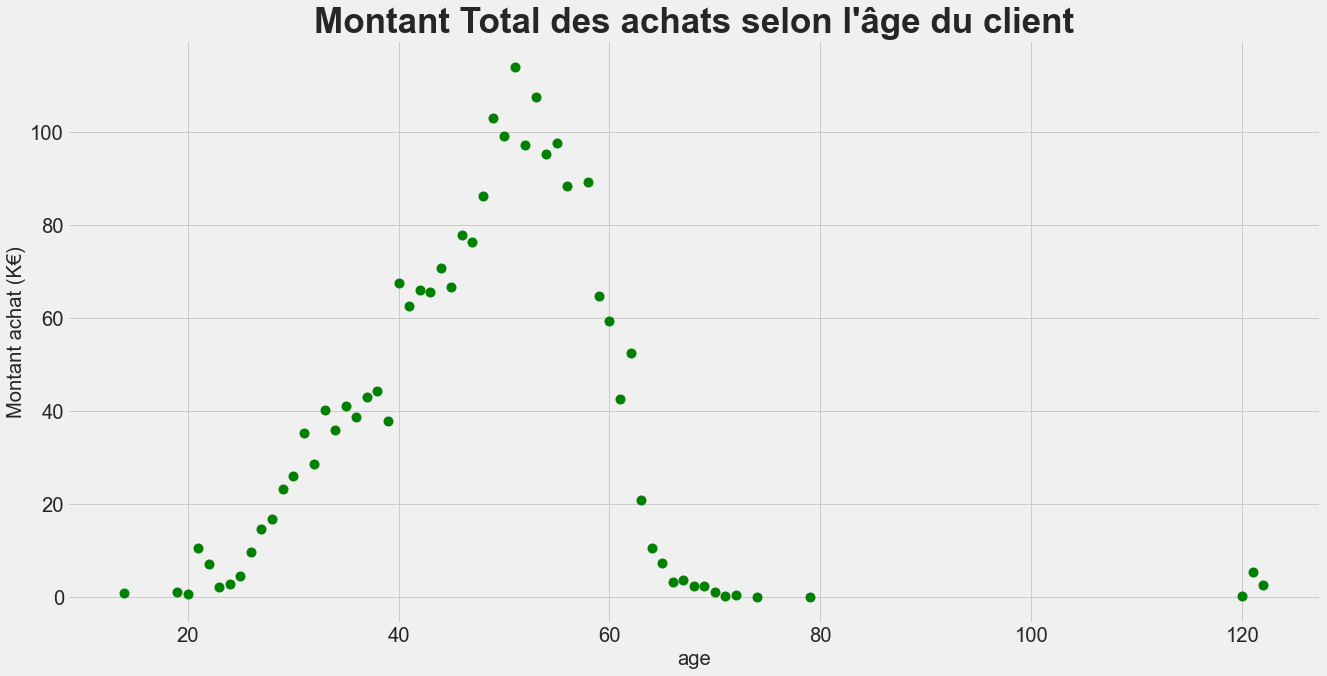

In [60]:
#Visualisation avec un scatterplot (âge clients vs montant total des achats)
plt.plot(age_price[age_price.PRICE_mensuel < 200].age, age_price[age_price.PRICE_mensuel < 200].PRICE_mensuel, 'o', color='green')

plt.xlabel('age')
plt.ylabel('Montant achat (K€)')
plt.title('Montant Total des achats selon l\'âge du client')

plt.savefig("Montant total des achats selon l'âge du client.png",dpi=120)

plt.show()

In [61]:
#Coefficient de corrélation linéaire de Pearson
coef_age_price = st.pearsonr(age_price.age, age_price.PRICE_mensuel)[0]
coef_age_price

-0.05056483565242091

Le coefficient est négatif par conséquent, on peut émettre l'hypothèse que plus les consommateurs sont âgés plus le montant total de leur achat est faible. Or le coefficient est plus proche de -1 que de zéro. Par conséquent, on peut affirmer que plus les consommateurs sont âgés plus le montant total de leur achat est faible.

## Corrélation entre l'âge des clients et la fréquence d’achat

In [62]:
# Analyse faite à partir du dataframe global data
data.head()

,DATE,Num-CDE,CLIENT_ID,SEX,BIRTH,ID_PROD,PRICE_mensuel,Durée total,CATEG,mois_année,age,classe_age
0,2017-01-12,602709,80033,F,1989,274745,193.48,49,0,Jan 2017,33,30-40
1,2020-10-15,755279,155250,F,1978,14531,405.40,31,0,Oct 2020,44,40-50
2,2020-10-14,752849,140344,M,1979,165540,422.17,31,0,Oct 2020,43,40-50
3,2020-10-14,762646,165402,M,1965,192734,423.33,31,0,Oct 2020,57,50-60
4,2020-10-14,766855,207795,M,1965,277795,236.19,43,0,Oct 2020,57,50-60


In [63]:
# Agrégation des données selon l'âge client
# Le nombre d'achat mensuel est obtenu à partir du comptage des sessions clients par mois
# Hypothèse 1 id_session = 1 transation
loc_freq = data.groupby('age').count().reset_index()
loc_freq = loc_freq[['age', 'CLIENT_ID']]

# Création d'une variable fréquence 'f'
loc_freq['f'] = loc_freq['CLIENT_ID'] / sum(loc_freq['CLIENT_ID'])
loc_freq.sort_values(by='age', ascending=False).head(10)

,age,CLIENT_ID,f
59,122,8,0.001152
58,121,21,0.003025
57,120,1,0.000144
56,79,1,0.000144
55,74,1,0.000144
54,72,1,0.000144
53,71,1,0.000144
52,70,2,0.000288
51,69,7,0.001008
50,68,5,0.000720


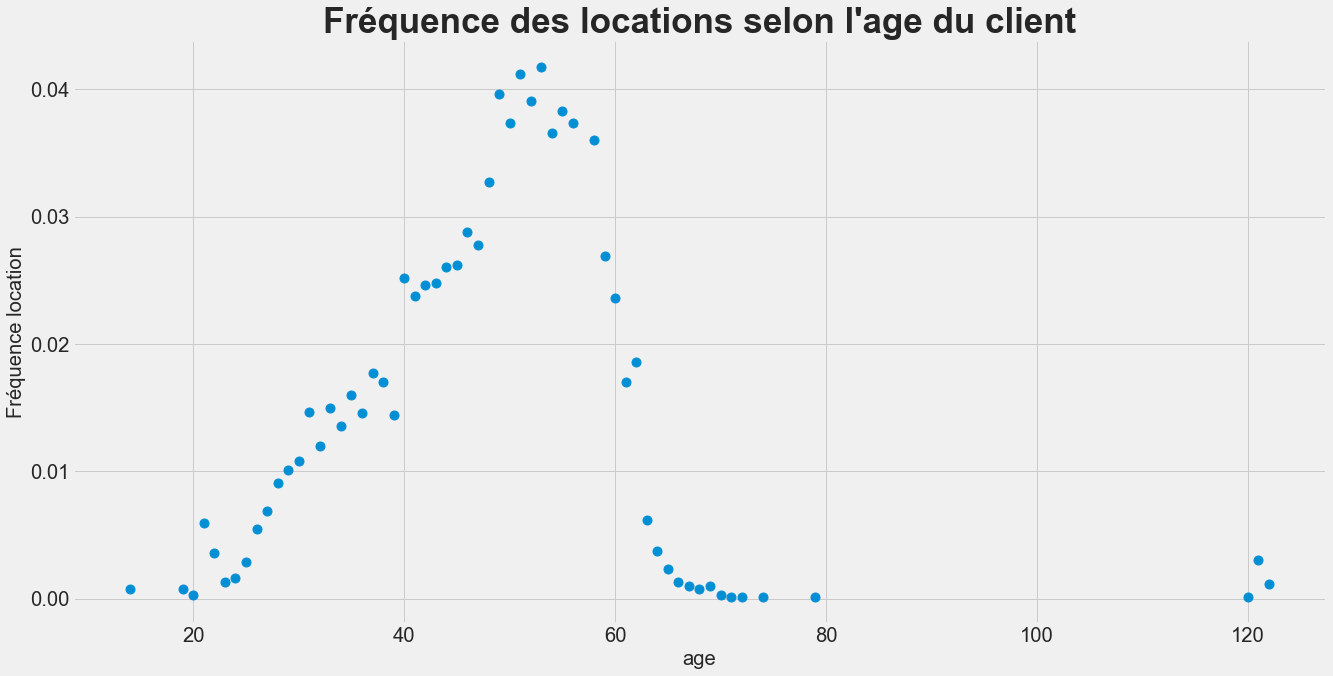

In [64]:
# Visualisation avec un scatterplot (âge client vs fréquence d'achat mensuelle)
# customers_freq.plot.scatter(x = 'age', y = 'f', marker = 'o', color='purple')
plt.plot(loc_freq[loc_freq.f < .05].age, loc_freq[loc_freq.f < .05].f, 'o')

plt.xlabel('age')
plt.ylabel('Fréquence location')
plt.title('Fréquence des locations selon l\'age du client')
plt.savefig("Fréquence des locations selon l'age du client.png",dpi=120)

plt.show()

In [65]:
# Coefficient de corrélation linéaire de Pearson
coef_loc_freq = st.pearsonr(loc_freq.age, loc_freq.f)[0]
coef_loc_freq

-0.05062875812525914

le coefficient est plus proche de -1 que de zéro, le lien entre l'âge des clients et leurs fréquences d'achat est faible. Il semblerait que des groupes de clients se formalisent sur cette corrélation

## Corrélation entre l'âge des clients et les catégories de produits

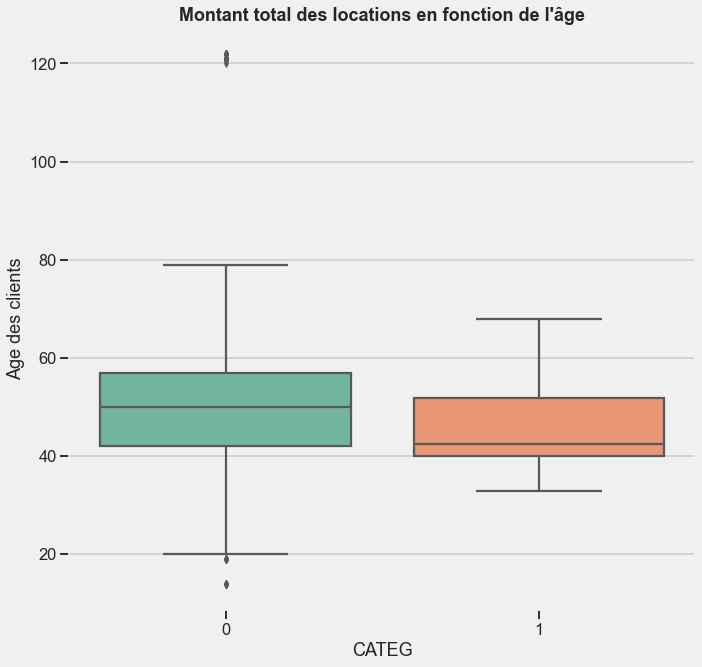

In [66]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

sns.boxplot(x='CATEG', y='age', data=data)
plt.ylabel('Age des clients')
plt.title('Montant total des locations en fonction de l\'âge')
plt.savefig("Montant total des locations en fonction de l'age.png",dpi=120)


plt.show()

In [67]:
X = data['CATEG'] # qualitative
Y = data['age'] # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.00013305200790582832


Le coefficient eta² est à 0 montre pas une corrélation entre l'âge des clients et la catégorie d'achat. Les clients les plus jeunes vont essentiellement se tourner vers la location de voiture de catégorie 0

# Conclusion

nous pouvons conclure que le CA a évolué au fil des ans

les produits de la catégorie 0 à un grand nombre de ventes, contrairement à la catégorie 1 qui représente 0.4% du chiffre d'affaires.

les hommes louent le plus que les femmes.

Il semblerait que les individus plus âgés louent le moins.

Il y a une consommation plus régulière, une plus grande fidélité par les individus entre la classe d'âge 30 à 65 ans.



